# Revisiting Hubble's Law with Hacker Stats in Python


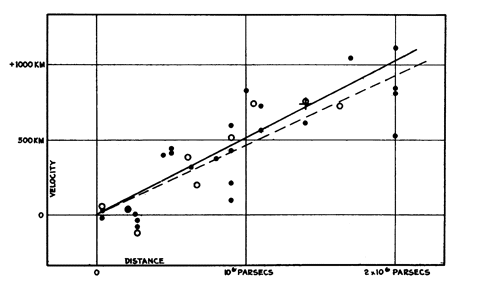

In [1]:
from IPython.display import Image
Image(filename='images/F1.large.png') 

Hubble's diagram of galactic recessional velocity versus distance. (Hubble, Proceedings of the National Academy of Sciences, 1929, 15, 168)

In this post, we will revisit Hubble's Law with the original dataset he used with 24 measurements of galactic distances and recessional velocities by running an Ordinary Least Squares Linear Regression.  Then, I will use a Pairs Bootstrap Resampling to calculate the RSS Minima and perform a Hypothesis Test on the measured effect of distance on recessional velocities of galaxies.

The results of the hypothesis test allow us to conclude with very high statistical signficance that distance does indeed have an effect on the recessional velocity of galaxies.  This is concrete evidence to validate Hubble's Law that the unvierse is constantly expanding. 

But first we should have little bit of background on Hubble's Law.

## Hubble's Law

In Edwin Hubble's famous PNAS article “A relation between distance and radial velocity among extra-galactic nebulae” Hubble provided evidence for one of science’s greatest discoveries: the expanding universe. Hubble demonstrated that galaxies are moving away from Earth with a velocity that is correlated to their distance from earth.  In other words, galaxies that are further away from Earth move away faster than nearby galaxies. This is commonly referred to as Hubble's Law.  Hubble’s classic graph of observed velocity vs. distance for nearby galaxies presented above, visualizes this phenomenon. This graph has become a milestone in the scientific community, as it displays the linear relationship between gallactic recessional velocity (v) and distance from Earth (d):

http://www.pnas.org/content/15/3/168

Here v is the galaxy's recessional velocity and d is the galaxy's distance from Earth.  H0 is an observationally determined constant called Hubble's constant. Although the expansion rate is constant in all directions at any given time, this rate changes with time throughout the life of the universe. The expansion rate at the present time, Ho, is about 70 km/s/Mpc (where 1 Mpc = 106 parsec = 3.26 × 106 light-y).

https://www.pnas.org/content/112/11/3173#F1

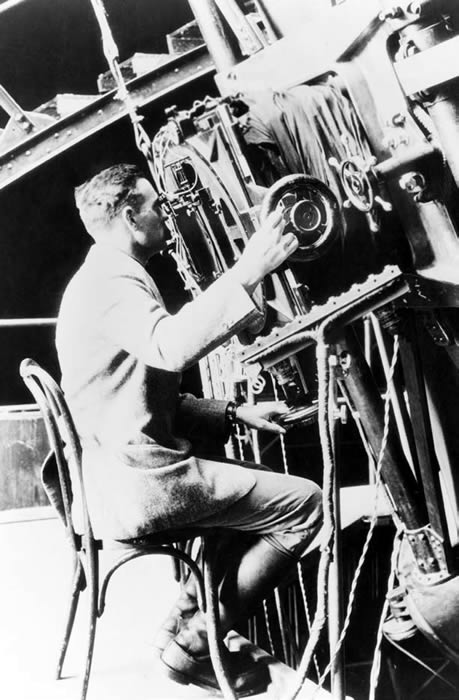

In [2]:
from IPython.display import Image
Image(filename='images/hubble used the hooker telescope.jpg') 

Hubble used the Hooker Telescope at Mount Wilson Observatory for some of his most important discoveries. © Emilio Segrè Visual Archives / American Institute of Physics / Photo Researchers, Inc.


Hubble’s remarkable feat was obtained using a very small sample of measurements of velocities and distances for 24 nearby galaxies. The distances to these galaxies had been inaccurately measured from the visible brightness of their stars. In addition to plotting all of the individual 24 galaxies in the graph, Hubble also grouped them into 9 clusters (open circles in Hubble's graph) based on their closeness in direction and distance, as a means of minimizing the scatter. Hubble’s experiment was conclusive in convincing the scientific community of the existence of the expanding universe.

https://www.pnas.org/content/112/11/3173#F1

Hubble’s diagram of galactic recessional velocity vs. distance from Earth shows a clear trend of increasing velocity with distance. What makes this graph astonishing is the far-reaching implications of the observed trend: we live in a large, dynamically evolving universe that is expanding in all directions around us. It is not the static universe that Einstein and others assumed in 1917. In fact, Einstein introduced a cosmological constant into his equations to keep the universe static, as it was then believed to be. To the contrary, Hubble results suggested that the universe has been expanding for billions of years, from an early beginning to the present (and future) time. 

https://www.pnas.org/content/112/11/3173#F1

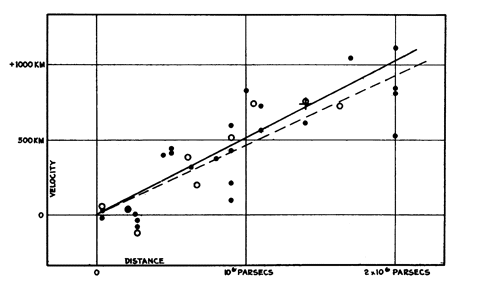

In [3]:
from IPython.display import Image
Image(filename='images/F1.large.png') 

Hubble's diagram of galactic recessional velocity versus distance. (Hubble, Proceedings of the National Academy of Sciences, 1929, 15, 168)

Velocity–distance relation among extragalactic nebulae (1). “Radial velocities, corrected for solar motion, are plotted against distances estimated from involved stars and mean luminosities of nebulae in a cluster. The black discs and full line represent the solution for solar motion using the nebulae individually; the circles and broken line represent the solution combining the nebulae into groups; the cross represents the mean velocity corresponding to the mean distance of 22 nebulae whose distances could not be estimated individually” (1). (Note: Velocity units should be in kilometers per second.)

http://www.pnas.org/content/15/3/168

Even though Hubble successfully observed the beautiful linear relationship, Hubble’s values for his distances in 1929 were too small by a factor of ~7.  The expansion rate Ho was also too large by the same factor. However, despite this large imprecision and its major implications for the expansion rate and age of the universe, Hubble’s fundamental discovery of the expanding universe is not affected.  The underlying linear v ∼ d equation continues to hold true!

https://www.pnas.org/content/112/11/3173#F1

It should also be noted that Albert Einstein's theory of relativity forecasts deviations from a strict linear interpretation of Hubble's law. The amount of deviation depends on the total mass of the universe. Such a plot of galactic recessional velocity vs. distance, can inform us about the amount of total matter in the universe.  It might also provide crucial information about dark matter.

https://starchild.gsfc.nasa.gov/docs/StarChild/questions/redshift.html

Hubble's Law was the first observational evidence in support of the Big Bang theory. Hubble was well renoun for his discoveries and in 1990 NASA named the Hubble space telescope after him.

https://www.khanacademy.org/humanities/big-history-project/big-bang/how-did-big-bang-change/a/edwin-hubble

Great! With that out of the way, now we can start diving into fun with hacker stats and Ordinary Least Squares (OLS) Linear Regression. Let's get started.

## Experimental Design (Methodology)
- Exploratory Data Analysis (EDA)
- Correcting distance by a factor of 7.
- OLS using original Hubble dataset of 24 measurements.
- Pairs Bootstrap
- Hypothesis Test --> measure effect of distance on Recession velocities

## About the Data

Source: "A relation between distance and radial velocity among extra-galactic nebulae" by Edwin Hubble
PNAS March 15, 1929 15 (3) 168-173; https://doi.org/10.1073/pnas.15.3.168
Communicated January 17, 1929

Column Names:

- Object Name: Name of galaxy.
- Distance [Mpc] (r): Distance from Earth in megaparsecs. Notes on units: 1 parsec = 3.26 light years, 1 Mpc = megaparsec = 10 parsecs.
- Velocity [Km/second] (v): Recessional velocity, how fast galaxy is moving away from Earth.

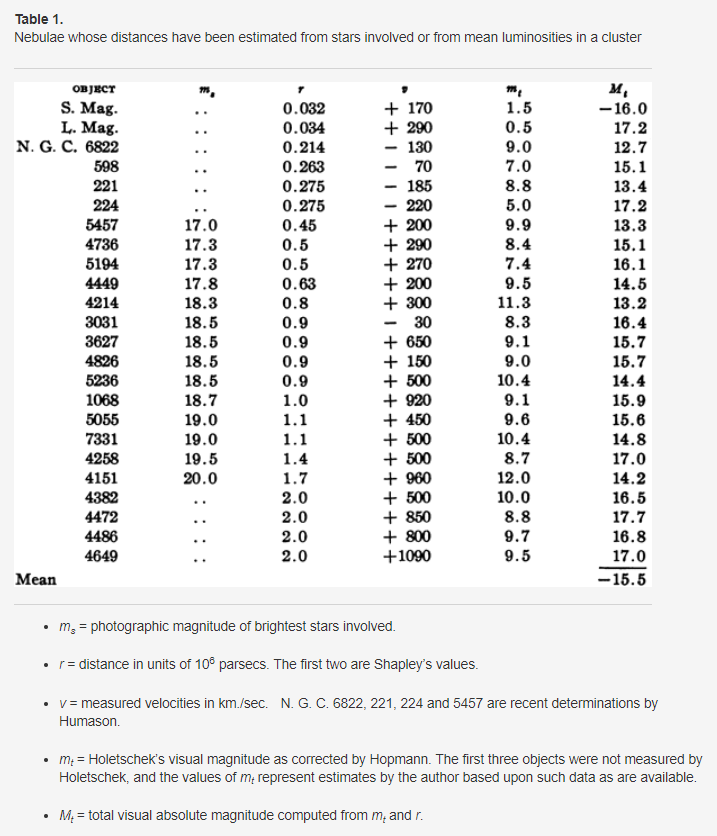

In [4]:
from IPython.display import Image
Image(filename='images/hubble data.png') 

## Import Functions

In [5]:
from hacker_ols import (load_hubble_data, normalize_deviations, plot_deviations,
                  plot_regplot, pearson_r, least_squares_sm, rss_rmse,
                  plot_prob_residuals, plot_hist_expected_ci, plot_linreg,
                  draw_bs_pairs_linreg, conf_int95, distr_mean_stde, 
                  rss_minima_viz, test_statistic, shuffle_and_split,
                  t_test)

## Import Data

In [6]:
df = load_hubble_data()

## EDA

The first thing we will do is look at the normalized deviations of distances and recessional velocities to assess the correlation visually. The mean describes the center of the data. The standard deviation describes the spread of the data. But to compare two variables, it is convenient to normalize them both.

### Normalized Deviations

In [7]:
d_velocity, d_distance, z_velocity, z_distance = normalize_deviations(x=df['distances'], y=df['velocities'])

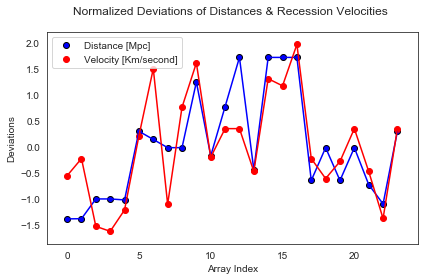

In [8]:
plot_deviations(x=z_velocity, 
                y=z_distance, 
                plt_title='Normalized Deviations of Distances & Recession Velocities \n',
                xlabel='Distance [Mpc]',
                ylabel='Velocity [Km/second]')

Just as we were informed, upon visual inspection of the two normalized arrays of deviations, with the exception fo the first couple of measurements the pairs seem to be highly correlated. Let's adjust the distance values and calculate the Pearson Correlation Coefficient afterwards.

### Adjust distances by Factor of 7

Now we are going to correct the distance values by multiplying by a factor of 7.  Let's look at the result of our adjustment.

In [9]:
df['distances7'] = df['distances']*7

In [10]:
df[['distances','distances7','velocities']].describe()

,distances,distances7,velocities
count,24.000000,24.000000,24.000000
mean,0.911375,6.379625,373.125000
std,0.645496,4.518470,371.254666
min,0.032000,0.224000,-220.000000
25%,0.406250,2.843750,165.000000
50%,0.900000,6.300000,295.000000
75%,1.175000,8.225000,537.500000
max,2.000000,14.000000,1090.000000


While our corrected variable of distance increased by a factor of 7, velocity and distance still seem to be correlated.  We can see how big of an effect our adjustment had by visualizing the correlation in a scatter plot.

### Correlation

In [11]:
cor = pearson_r(x=df['distances7'], y=df['velocities'])

Correlation (pearson r): 0.79


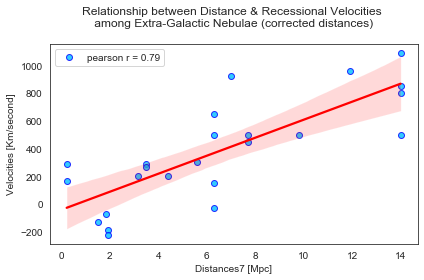

In [12]:
plot_regplot(
    x='distances7', 
    y='velocities',
    data=df,
    xlabel='Distances7 [Mpc]',
    ylabel='Velocities [Km/second]', 
    legend='pearson r = {:.02f}'.format(cor),
    plt_title='Relationship between Distance & Recessional Velocities \n among Extra-Galactic Nebulae (corrected distances) \n'
)

We can see that the data exhibits a strong linear correlation with a Pearson Correlation Coefficient of .79.  This graph doesn't look much different than the one that Hubble created, aside from the x-axis correction. Let's run an Ordinary Least Squares Linear Regression to further understand this relationship as a result of a linear function.

## OLS

In [13]:
model7 = least_squares_sm(x='distances7', formula="velocities ~ distances7", df=df)

For slope a1=64.88, the uncertainty in a1 is 10.75

For intercept a0=-40.78, the uncertainty in a0 is 83.44

                            OLS Regression Results                            
Dep. Variable:             velocities   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     36.44
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           4.48e-06
Time:                        12:43:22   Log-Likelihood:                -163.83
No. Observations:                  24   AIC:                             331.7
Df Residuals:                      22   BIC:                             334.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [14]:
print('R2: {:.02f}'.format(model7.rsquared))

R2: 0.62


For every unit increase in distance, recessional velocity increases by 64.88 km per second. Note that this is close to the calibrated Ho value of 70 km per second that was mentioned before.

R-squared could be interpreted as 62% of the variance of velocities are explained by distance.  

We've already validated Hubble's Law with a couple of lines of Python code.  We examined correlation and concluded with enough confidence that the majority of variance can be explained by the model.  Technically, we could stop at this point and call it day.  But let's take this a step further and understand the residuals like any good scientist would.

### Residual Sum of the Squares

In [15]:
y_model = model7.predict(df)

In [16]:
RSS, residuals, MSE, RMSE = rss_rmse(
    y_data=df['velocities'],
    y_model=y_model,
    model_intercept=model7.params['Intercept'],
    model_slope=model7.params['distances7']
)

RMSE = 222.99, MSE = 49726.77, RSS = 1193442.37
Parameters a0=-40.78364909586052, a1=64.87977727466124 yield RSS=1193442.37


If we interpret r-squared as the variances that might be explained by our OLS model, the residual sum of squares (RSS) represents the amount of variances or errors that are not explained by the model.

The solution of OLS regression is the set of coefficient values for which the RSS is minimal.  We'll revisit this topic in the exercise when we look at bootstrap resampling.

Here we have Root Mean Square Error (RMSE) of about 223, which can be interpreted as the spread of prediction errors, or how concentrated the data is around the line of best fit.  Let's look at a probablity plot to visualize the spread of residuals.

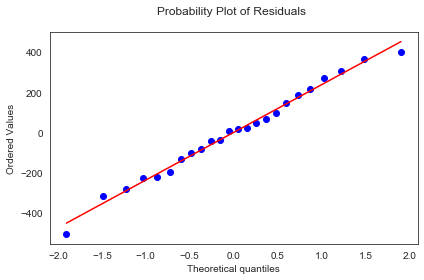

In [17]:
plot_prob_residuals(residuals=residuals)

The probability plot of the residuals of our OLS model are approximately linear, supporting the assumption that the error terms are normally distributed.

Again we could also stop right here, but we're going to keep moving and generate some bootstrap replicates to validate some of the conclusions we've witnessed from OLS Regression and uncover a couple of new ones.

## Resampling with Bootstrap Pairs

Pairs bootstrap involves resampling pairs of data with replacement. Each collection of pairs fit with a regression model. We do this again and again, getting bootstrap replicates of the explanatory and dependent variables, as well as the model parameter values after running the OLS model.

The goal is to use bootstrap resampling to compute one mean for each resample and create a distribution of sample means, and then compute the standard error as a way to quantify the "uncertainty" in the sample statistic as an estimator for the population statistic.  This comes in very handy since we don't know the population mean or standard deviation, instead, we will infer it using bootstrap resampling.

According to the central limit theoreom, if we generate enough replicates the resampled distributions will follow a normal distribution, which is one of the assumptions for a hypothesis test.  We're going to generate 1000 replicates for each variable, x and y.

In [18]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_means_dist, bs_means_veloc, bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
    x=df['distances7'], 
    y=df['velocities'], 
    size=1000
)

[4.78075208 8.16361146]

Bootstrap Distribution: center=6.47, spread=0.90



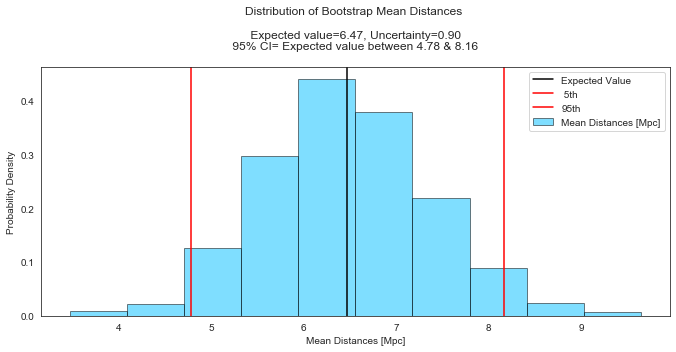

In [19]:
# Compute and print 95% CI for distances expected value
dist_ci95 = conf_int95(np_array=bs_means_dist)

# compute expected value and uncertainty
expected_value, uncertainty = distr_mean_stde(distribution=bs_means_dist) 

# plot histogram
plot_hist_expected_ci(
    data=bs_means_dist,
    distribution_mean=expected_value,
    ci=dist_ci95,
    plt_title='Distribution of Bootstrap Mean Distances \n \n Expected value={:0.02f}, Uncertainty={:0.02f} \n 95% CI= Expected value between {:0.02f} & {:0.02f}'.format(expected_value, uncertainty, dist_ci95[0], dist_ci95[1]), 
    data_label='Mean Distances [Mpc]',
    kde=False,
    bins=10
)

We inferred that the expected average value of distances is 6.47 with an uncertainty of .9.  This is really close to the sample mean and standard deviation that we generated early on.  In addition, we can infer with 95% confidence that the true population average lies somewhere between 4.78 and 8.16, based on the data that was provided.

Notice we have a black line in the middle to mark the expected value.  Uncertainty here is just one measure of spread of the distribution of sample means.  Moreover, notice the uncertainty we computed also fits inside the confidence interval. Think of the uncertainty here as the 'one sigma' confidence interval.

In addition, the vertical red lines mark 5th (left) and 95th (right) percentiles mark the extent of the confidence interval to find the range of values containing the inner 95% of the sample means.

[237.69791667 526.26041667]

Bootstrap Distribution: center=377.58, spread=73.54



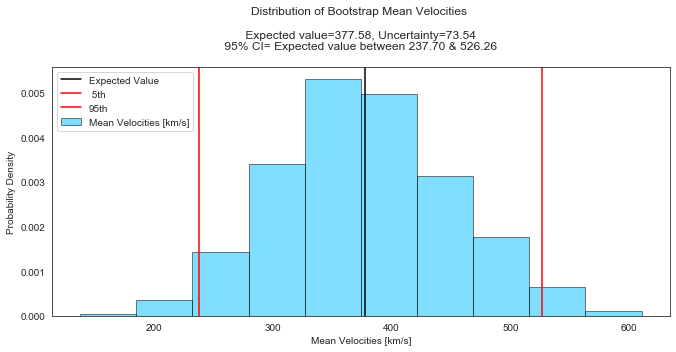

In [20]:
# Compute and print 95% CI for velocity expected value
veloc_ci95 = conf_int95(np_array=bs_means_veloc)

# compute expected value and uncertainty
expected_value, uncertainty = distr_mean_stde(distribution=bs_means_veloc) 

# plot histogram
plot_hist_expected_ci(
    data=bs_means_veloc,
    distribution_mean=expected_value,
    ci=veloc_ci95,
    plt_title='Distribution of Bootstrap Mean Velocities \n \n Expected value={:0.02f}, Uncertainty={:0.02f} \n 95% CI= Expected value between {:0.02f} & {:0.02f}'.format(expected_value, uncertainty, veloc_ci95[0], veloc_ci95[1]), 
    data_label='Mean Velocities [km/s]', 
    kde=False,
    bins=10
)

Similarly for velocities, We inferred that the expected average value of velocities is 377.58 with an uncertainty of 73.54.  In addition, we can infer with 95% confidence that the true population average lies somewhere between 237.7 and 526.26, again based on the data that was provided.

Now we're going to conduct a similar exercise, this time with the model slope and intercept parameters.  That's right!  You can also use bootstrap re-sampling to compute the estimate, standard error and confidence interval for OLS model parameters, all thanks to the central limit thereom.  We're basically going to use the each pairs bootstrap replicate generated as an input into an OLS model to generate bootstrap slopes and intercepts.  Let's give it a try.

[46.33035669 87.33859793]

Bootstrap Distribution: center=65.17, spread=10.33



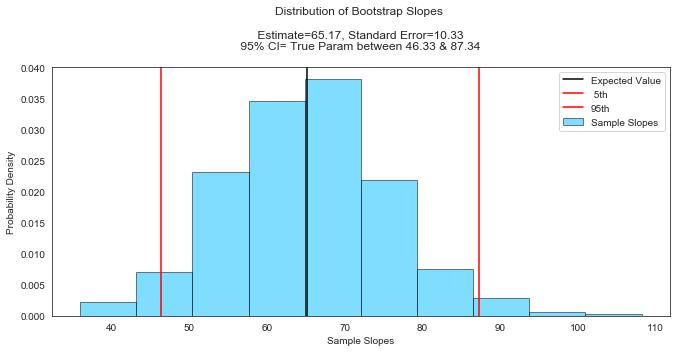

In [21]:
# Compute and print 95% CI for slope
slope_ci95 = conf_int95(np_array=bs_slope_reps)

# compute estimate and standard error
slope_estimate, slope_se = distr_mean_stde(distribution=bs_slope_reps) 

# plot histogram
plot_hist_expected_ci(
    data=bs_slope_reps, 
    plt_title='Distribution of Bootstrap Slopes \n \n Estimate={:0.02f}, Standard Error={:0.02f} \n 95% CI= True Param between {:0.02f} & {:0.02f}'.format(slope_estimate, slope_se, slope_ci95[0], slope_ci95[1]), 
    distribution_mean=slope_estimate,
    ci=slope_ci95,
    data_label='Sample Slopes',
    kde=False,
    bins=10
)

We inferred the slope estimate is 65.17 with a standard error of 10.33.  We are 95% confident that the true slope lies somewhere between 46.33 and 87.34, based on the data provided.

Note that this is very similar to the summary output of a statsmodels ols() linear regression model.  What a great check!

[-200.98574668  104.23141337]

Bootstrap Distribution: center=-43.23, spread=78.44



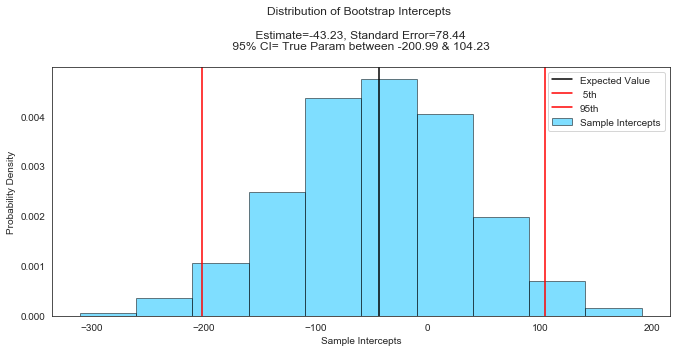

In [22]:
# Compute and print 95% CI for intercept
intercept_ci95 = conf_int95(np_array=bs_intercept_reps)

# compute estimate and standard error
intercept_estimate, intercept_se = distr_mean_stde(distribution=bs_intercept_reps)

# plot histogram
plot_hist_expected_ci(
    data=bs_intercept_reps, 
    plt_title='Distribution of Bootstrap Intercepts \n \n Estimate={:0.02f}, Standard Error={:0.02f} \n 95% CI= True Param between {:0.02f} & {:0.02f}'.format(intercept_estimate, intercept_se, intercept_ci95[0], intercept_ci95[1]),
    distribution_mean=intercept_estimate,
    ci=intercept_ci95,
    data_label='Sample Intercepts',
    kde=False,
    bins=10
)

We inferred the intercept estimate is -43.23 with a standard error of 78.44.  We are 95% confident that the true intercept lies somewhere between -200.99 and 104.23, based on the data provided.

Now we're going to generate the RSS Minima via Resampling with Pairs Bootstrap.

## Visualizing the RSS Minima with Resampling

Recall when we looked at RSS, the solution of OLS is the set of coefficient values for which the RSS is minimal.  Now we're going to use the same replicates we generated to visualize the RSS Minima. Then we're going to retrieve the model parameters (slope and intercept) that generated the RSS Minima. 

RMSE = 237.03, MSE = 56184.77, RSS = 1348434.43
Parameters a0=-24.581333548699718, a1=64.3819155119536 yield RSS=1348434.43

RMSE = 212.81, MSE = 45289.72, RSS = 1086953.34
Parameters a0=-73.07541541222048, a1=73.5485180818052 yield RSS=1086953.34

RMSE = 237.08, MSE = 56206.81, RSS = 1348963.32
Parameters a0=-68.82829970680751, a1=72.07244107793751 yield RSS=1348963.32

RMSE = 233.11, MSE = 54342.53, RSS = 1304220.64
Parameters a0=40.53354563297171, a1=50.723820936787334 yield RSS=1304220.64

RMSE = 269.98, MSE = 72887.27, RSS = 1749294.47
Parameters a0=-8.941007009063412, a1=65.94020818188253 yield RSS=1749294.47

RMSE = 199.10, MSE = 39642.79, RSS = 951426.92
Parameters a0=-159.71683833788077, a1=78.2862436133994 yield RSS=951426.92

RMSE = 275.67, MSE = 75991.49, RSS = 1823795.71
Parameters a0=16.65908459677354, a1=54.32949424532318 yield RSS=1823795.71

RMSE = 236.65, MSE = 56002.71, RSS = 1344065.06
Parameters a0=43.31126440386936, a1=59.25970921597256 yield RSS=1344065.06

RMSE 

RMSE = 196.96, MSE = 38794.53, RSS = 931068.69
Parameters a0=-5.772902092626111, a1=64.41296445163799 yield RSS=931068.69

RMSE = 190.93, MSE = 36453.16, RSS = 874875.89
Parameters a0=29.24918449807558, a1=40.01041999017591 yield RSS=874875.89

RMSE = 256.52, MSE = 65803.04, RSS = 1579272.86
Parameters a0=-8.20888862759142, a1=66.9486646909486 yield RSS=1579272.86

RMSE = 202.64, MSE = 41064.24, RSS = 985541.86
Parameters a0=-156.86213935965424, a1=108.21635579974834 yield RSS=985541.86

RMSE = 224.64, MSE = 50463.81, RSS = 1211131.43
Parameters a0=-22.318156477655236, a1=63.245044940483496 yield RSS=1211131.43

RMSE = 221.58, MSE = 49098.01, RSS = 1178352.20
Parameters a0=36.137009845499335, a1=64.79205227983687 yield RSS=1178352.20

RMSE = 216.49, MSE = 46869.10, RSS = 1124858.30
Parameters a0=-91.83430649831666, a1=65.41604186485016 yield RSS=1124858.30

RMSE = 230.14, MSE = 52964.14, RSS = 1271139.33
Parameters a0=-120.15424230236005, a1=62.34274053917536 yield RSS=1271139.33

RMSE

RMSE = 230.61, MSE = 53180.84, RSS = 1276340.18
Parameters a0=-61.965690186432596, a1=67.52939193813289 yield RSS=1276340.18

RMSE = 210.71, MSE = 44397.34, RSS = 1065536.16
Parameters a0=19.90392067495634, a1=50.5188132803459 yield RSS=1065536.16

RMSE = 169.84, MSE = 28846.24, RSS = 692309.76
Parameters a0=-121.58877783351994, a1=67.45318124934533 yield RSS=692309.76

RMSE = 167.15, MSE = 27939.72, RSS = 670553.29
Parameters a0=-183.2718398045712, a1=80.4833800213534 yield RSS=670553.29

RMSE = 139.18, MSE = 19370.41, RSS = 464889.79
Parameters a0=-140.44388041705423, a1=82.52391940519239 yield RSS=464889.79

RMSE = 201.63, MSE = 40652.75, RSS = 975666.08
Parameters a0=-50.29887159048951, a1=71.12378469238374 yield RSS=975666.08

RMSE = 183.15, MSE = 33544.81, RSS = 805075.54
Parameters a0=-19.177171566351774, a1=57.88659270961201 yield RSS=805075.54

RMSE = 228.11, MSE = 52033.24, RSS = 1248797.71
Parameters a0=-67.8983812783161, a1=59.921306496703785 yield RSS=1248797.71

RMSE = 18

RMSE = 214.23, MSE = 45896.12, RSS = 1101506.80
Parameters a0=-27.94627735807842, a1=59.88952857076658 yield RSS=1101506.80

RMSE = 151.47, MSE = 22942.77, RSS = 550626.41
Parameters a0=-278.78395761941016, a1=96.80100788160465 yield RSS=550626.41

RMSE = 233.05, MSE = 54313.62, RSS = 1303526.96
Parameters a0=-33.85607048888056, a1=70.28945610320429 yield RSS=1303526.96

RMSE = 238.58, MSE = 56920.06, RSS = 1366081.37
Parameters a0=-66.5894149538438, a1=66.05455302873244 yield RSS=1366081.37

RMSE = 170.32, MSE = 29007.86, RSS = 696188.61
Parameters a0=61.40469589101161, a1=60.30843265981775 yield RSS=696188.61

RMSE = 179.30, MSE = 32147.52, RSS = 771540.39
Parameters a0=-55.99619579097549, a1=72.35374880109138 yield RSS=771540.39

RMSE = 229.26, MSE = 52558.10, RSS = 1261394.29
Parameters a0=2.100737540072828, a1=69.44908735400516 yield RSS=1261394.29

RMSE = 214.56, MSE = 46035.21, RSS = 1104845.13
Parameters a0=-76.85674657043484, a1=65.47040615612396 yield RSS=1104845.13

RMSE = 1

RMSE = 201.15, MSE = 40460.74, RSS = 971057.73
Parameters a0=17.447301986118248, a1=56.62109252808456 yield RSS=971057.73

RMSE = 194.43, MSE = 37804.08, RSS = 907297.86
Parameters a0=123.20250909938534, a1=57.10138396101051 yield RSS=907297.86

RMSE = 168.30, MSE = 28325.92, RSS = 679822.03
Parameters a0=19.51079069088638, a1=49.09974075160154 yield RSS=679822.03

RMSE = 199.09, MSE = 39635.18, RSS = 951244.30
Parameters a0=-37.803546487258245, a1=68.21869299483278 yield RSS=951244.30

RMSE = 173.96, MSE = 30263.33, RSS = 726319.92
Parameters a0=123.27133848546737, a1=64.21165361736568 yield RSS=726319.92

RMSE = 248.69, MSE = 61846.25, RSS = 1484310.03
Parameters a0=-6.638571714366094, a1=61.647600382232 yield RSS=1484310.03

RMSE = 230.40, MSE = 53086.29, RSS = 1274070.97
Parameters a0=-46.15509285253319, a1=60.50639677916213 yield RSS=1274070.97

RMSE = 223.62, MSE = 50005.01, RSS = 1200120.25
Parameters a0=4.578660993180279, a1=72.36046629167674 yield RSS=1200120.25

RMSE = 223.72

RMSE = 198.20, MSE = 39282.77, RSS = 942786.52
Parameters a0=-109.80609065497424, a1=57.112428695048656 yield RSS=942786.52

RMSE = 210.78, MSE = 44426.22, RSS = 1066229.31
Parameters a0=6.826998448135612, a1=55.77682923108806 yield RSS=1066229.31

RMSE = 233.15, MSE = 54361.06, RSS = 1304665.50
Parameters a0=-91.22421088444378, a1=67.1701930417004 yield RSS=1304665.50

RMSE = 191.69, MSE = 36743.90, RSS = 881853.63
Parameters a0=94.07304653145934, a1=44.75405450996665 yield RSS=881853.63

RMSE = 275.09, MSE = 75673.65, RSS = 1816167.63
Parameters a0=-43.4604305105849, a1=62.98376510655825 yield RSS=1816167.63

RMSE = 191.06, MSE = 36503.01, RSS = 876072.23
Parameters a0=-11.21136135643394, a1=72.29818317908101 yield RSS=876072.23

RMSE = 211.28, MSE = 44639.93, RSS = 1071358.38
Parameters a0=-110.73444792547429, a1=70.1867366965626 yield RSS=1071358.38

RMSE = 199.70, MSE = 39878.84, RSS = 957092.14
Parameters a0=-59.92602644974767, a1=73.08109833155494 yield RSS=957092.14

RMSE = 191

RMSE = 248.89, MSE = 61948.07, RSS = 1486753.72
Parameters a0=-30.664733399278333, a1=55.88553615002993 yield RSS=1486753.72

RMSE = 182.53, MSE = 33318.73, RSS = 799649.59
Parameters a0=17.89748991028472, a1=63.39936846063885 yield RSS=799649.59

RMSE = 221.94, MSE = 49257.84, RSS = 1182188.19
Parameters a0=-69.19817632412992, a1=73.12605965399423 yield RSS=1182188.19

RMSE = 230.28, MSE = 53027.43, RSS = 1272658.41
Parameters a0=103.43206100658057, a1=50.57735662364579 yield RSS=1272658.41

RMSE = 232.44, MSE = 54027.66, RSS = 1296663.76
Parameters a0=-23.971698290766426, a1=69.12205746221865 yield RSS=1296663.76

RMSE = 198.89, MSE = 39557.35, RSS = 949376.44
Parameters a0=-28.755944679809886, a1=59.091467831879974 yield RSS=949376.44

RMSE = 222.93, MSE = 49697.59, RSS = 1192742.06
Parameters a0=35.72677170860919, a1=61.975642557718054 yield RSS=1192742.06

RMSE = 292.52, MSE = 85568.91, RSS = 2053653.88
Parameters a0=9.44519419573868, a1=61.2521039079096 yield RSS=2053653.88

RMSE

RMSE = 240.05, MSE = 57625.10, RSS = 1383002.33
Parameters a0=-59.813869858678856, a1=69.50620170873567 yield RSS=1383002.33

RMSE = 217.95, MSE = 47501.34, RSS = 1140032.21
Parameters a0=-103.74467521762685, a1=62.65834938583176 yield RSS=1140032.21

RMSE = 247.63, MSE = 61322.77, RSS = 1471746.46
Parameters a0=-89.1716272378049, a1=71.0924837426282 yield RSS=1471746.46

RMSE = 280.43, MSE = 78643.27, RSS = 1887438.56
Parameters a0=-85.68043868644219, a1=69.49937482194981 yield RSS=1887438.56

RMSE = 171.05, MSE = 29256.75, RSS = 702162.10
Parameters a0=90.25977215733059, a1=41.93403551614654 yield RSS=702162.10

RMSE = 240.66, MSE = 57919.03, RSS = 1390056.66
Parameters a0=-49.345497196687916, a1=67.5303216791509 yield RSS=1390056.66

RMSE = 232.78, MSE = 54186.60, RSS = 1300478.46
Parameters a0=-60.87133666295421, a1=71.59186144052372 yield RSS=1300478.46

RMSE = 178.87, MSE = 31994.47, RSS = 767867.30
Parameters a0=-73.39464587706783, a1=66.35611461802489 yield RSS=767867.30

RMSE 

RMSE = 253.87, MSE = 64451.44, RSS = 1546834.67
Parameters a0=-101.86627630837256, a1=64.67487911471324 yield RSS=1546834.67

RMSE = 212.15, MSE = 45009.12, RSS = 1080218.90
Parameters a0=41.70722301936661, a1=60.40713137054913 yield RSS=1080218.90

RMSE = 184.75, MSE = 34133.29, RSS = 819198.90
Parameters a0=-33.67749161877987, a1=64.04037677092754 yield RSS=819198.90

RMSE = 219.27, MSE = 48077.45, RSS = 1153858.77
Parameters a0=-86.47025693571402, a1=70.30868651742739 yield RSS=1153858.77

RMSE = 144.89, MSE = 20992.04, RSS = 503808.96
Parameters a0=100.41165296851415, a1=49.07225075988098 yield RSS=503808.96

RMSE = 224.35, MSE = 50332.20, RSS = 1207972.82
Parameters a0=-52.006082120678286, a1=60.918163250806245 yield RSS=1207972.82

RMSE = 240.16, MSE = 57676.16, RSS = 1384227.89
Parameters a0=-2.888880471033019, a1=67.09992691724025 yield RSS=1384227.89

RMSE = 208.84, MSE = 43613.60, RSS = 1046726.38
Parameters a0=-141.12482642438312, a1=73.4592053724086 yield RSS=1046726.38

RM

RMSE = 203.62, MSE = 41460.71, RSS = 995057.04
Parameters a0=-76.74562349043958, a1=65.56938835122979 yield RSS=995057.04

RMSE = 152.48, MSE = 23249.40, RSS = 557985.52
Parameters a0=-191.4116109665365, a1=78.972082727137 yield RSS=557985.52

RMSE = 214.59, MSE = 46050.32, RSS = 1105207.69
Parameters a0=-4.814780127415304, a1=56.318067364876406 yield RSS=1105207.69

RMSE = 222.54, MSE = 49525.08, RSS = 1188601.90
Parameters a0=-33.36290385875577, a1=64.58014066285897 yield RSS=1188601.90

RMSE = 200.95, MSE = 40380.68, RSS = 969136.44
Parameters a0=-90.89451135518294, a1=60.2758111416348 yield RSS=969136.44

RMSE = 177.43, MSE = 31482.76, RSS = 755586.19
Parameters a0=16.98977820622764, a1=62.197096225458324 yield RSS=755586.19

RMSE = 238.12, MSE = 56698.96, RSS = 1360775.08
Parameters a0=-90.16526206596154, a1=82.33764305049522 yield RSS=1360775.08

RMSE = 214.19, MSE = 45877.92, RSS = 1101070.13
Parameters a0=-189.19540780171033, a1=96.32062629163403 yield RSS=1101070.13

RMSE = 25

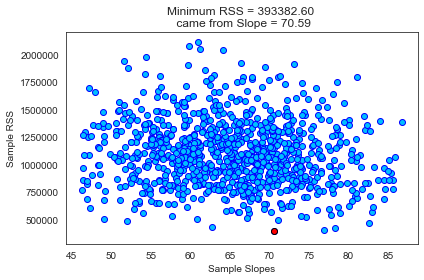

In [23]:
best_rss_df = rss_minima_viz(
    x=df['distances7'], 
    y=df['velocities'],
    slope_ci95=slope_ci95, 
    intercept_ci95=intercept_ci95,
    size=1000
)

Great job! The best slope and intercept are the ones out of arrays of slopes and intercepts that yielded the minimum RSS value.  Note that behind the scenes, we used the confidence intervals we generated early to filter out RSS values that didn't fall into our range of parameter values.

Now that we have the RSS Minima, and the model parameters that yielded it, we can visualize the new model with a scatter plot.

In [24]:
rss_predictions = best_rss_df['Bootstrap Intercepts'].values[0] + (best_rss_df['Bootstrap Slopes'].values[0] * df['distances7'])

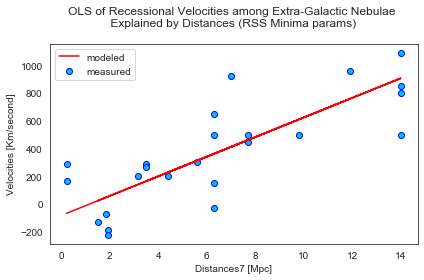

In [25]:
plot_linreg(
    x=df['distances7'], 
    y=df['velocities'], 
    predictions=rss_predictions,
    plt_title='OLS of Recessional Velocities among Extra-Galactic Nebulae \n Explained by Distances (RSS Minima params) \n',
    xlabel='Distances7 [Mpc]',
    ylabel='Velocities [Km/second]'
)

If we compare this to the scatter plot we generated early (during EDA), notice that there's a slight difference upon inspection as the red line doesn't pass through the second nebulae from the top at 14 mpc, but rather is slightly above it.  We can consider this an improvement in the overall fit of model! 

In the final chapter, we will conduct a hypothesis test to examine the theory that short and long distances have an effect on the galactic recessional velocities.  We've already used a number of tools in our hacker stats toolbox to validate Hubble's Law.  Let's put the finishing touches on the icing of the cake!

## Hypothesis Test

Recall that we used the assumption of the central limit theoreom to generate enough replicates to obtain paired distributions of galactic distances and recessional velocities that were both normal.  This is one of the assumptions required for a hypothesis test.

Now we will test whether the length of gallactic distance has an effect on recessional velocity.  We will define short and long distances of nebullae from our planet, Earth.  Then we will resample and shuffle the velocities and take the mean difference as a test statistic.  In other words, if the shuffled resamples truly exhibit a difference in effect (ie. different mean velocities) then we can reject the null hypothesis, and conclude with enough power that the results are statistically significant.  

See the null and alternative hypotheses below:

### Null Hypothesis
- the length of distance has no effect on the recessional velocities of Extra Gallactic Nebullae

### Alternative Hypothesis
- the length of distance has an effect on the recessional velocities of Extra Gallactic Nebullae

### Assumptions

For our experiment, we will use a 95% significance level, which will make our alpha value 0.05.  We define short distances as distances less than 7 Mpc; Conversely, we define long distances as distances that are greater or equal to 7 Mpc --> Note that this will be done with our corrected values for distances.

We're going to use a T-test, since we do not know the true standard deviation of the population.

The test statistic is the difference between a velocity drawn from shorter distances and one drawn from longer distances. The distribution of difference values is built up by subtracting each point in the short range with one from the long range to see if the mean difference is not equal to zero, also known the effect size.

In [26]:
# Shuffle an Resample the distances
shuffle_resample1, shuffle_resample2 = shuffle_and_split(
    short_distances=df[df['distances7'] < 7]['velocities'],
    long_distances=df[df['distances7'] >= 7]['velocities'],
    size=1000
)

In [27]:
# Calculate the test statistic distribution, effect size and standard error
shuffled_test_statistic_dist, shuffled_effect_size, shuffled_standard_error = test_statistic(
    resample1=shuffle_resample1, 
    resample2=shuffle_resample2
)

Test Statistic: Effect Size=83.76, Standard Error=495.48


In [28]:
# Run the t-test
_, p_value = t_test(
    sample1=shuffle_resample1, 
    sample2=shuffle_resample2
)

The P-value is = 0.00000011



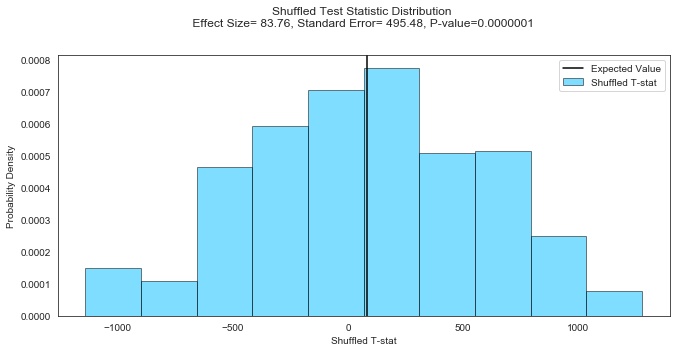

In [29]:
plot_hist_expected_ci(
    data=shuffled_test_statistic_dist, 
    distribution_mean=shuffled_effect_size, 
    plt_title='Shuffled Test Statistic Distribution \n Effect Size= {:0.2f}, Standard Error= {:0.2f}, P-value={:0.7f} \n'.format(shuffled_effect_size, shuffled_standard_error, p_value),
    data_label='Shuffled T-stat',
    ci=slope_ci95,
    draw_ci=False,
    kde=False,
    bins=10
)

The mean of the test statistic is not zero, which tells us that there is on average a difference in velocity when comparing short and long galactic distances. In other words, galaxies that are closer to Earth are moving away at a much slower rate than galaxies that are a lot further away from Earth.  Again, we call this the 'effect size'. The increase in distance had an effect on recessional velocity. The standard error of the test statistic distribution is not zero, so there is some uncertainty in the size of the effect.

Notice that our effect size is not exactly zero because there is noise in the data.  It's also worthwhile to note that shuffling the resampled data points has an effect on the randomness of our experiment.  We shuffled the data in order to make sure that each sample is composed of random and independent data points.  If we didn't shuffle the data then the effect size would be much greater due to the time ordered effect on the mean.

Finally, our P-value is extremely small: 0.0000001.  So we can conclude with very high statistical signficance that distance does indeed have an effect on the recessional velocity of galaxies, which is concrete evidence for Hubble's Law that the unvierse is constantly expanding!

## Next Steps
- Use 22 estimated distances for T-test
- Identify Nebulae Clusters with KMeans
- Use other data of galaxy distances & recessional velocities...